In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

sns.set(style="white")

In [2]:
# Useful function

def get_highest_values(arr, n):
    return np.array(arr).argsort()[-n:][::-1]

def get_lowest_values(arr, n):
    return np.array(arr).argsort()[::-1][-n:][::-1]

In [3]:
data_file = "data/temp.train"

## Correlation analysis between SVD features

In [4]:
df = pd.read_csv(data_file, sep=';', header=None)
df = df.drop(df.columns[[0]], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,0.747867,0.015906,0.013435,0.010133,0.009132,0.006958,0.006652,0.006193,0.005855,0.005532,...,0.000031,0.000028,0.000023,0.000020,0.000014,0.000014,0.000010,0.000007,0.000003,2.854226e-16
1,0.742556,0.016040,0.013593,0.010234,0.009399,0.007116,0.006650,0.006278,0.006005,0.005751,...,0.000057,0.000053,0.000043,0.000033,0.000029,0.000025,0.000022,0.000012,0.000006,3.012061e-16
2,0.741817,0.016078,0.013635,0.010261,0.009387,0.007099,0.006711,0.006291,0.006031,0.005788,...,0.000067,0.000060,0.000060,0.000048,0.000036,0.000033,0.000017,0.000013,0.000006,1.667818e-16
3,0.728526,0.016202,0.014147,0.010591,0.009438,0.007605,0.006869,0.006649,0.006454,0.006113,...,0.000118,0.000107,0.000101,0.000078,0.000072,0.000056,0.000033,0.000020,0.000006,3.226420e-16
4,0.747843,0.015910,0.013440,0.010138,0.009140,0.006962,0.006653,0.006193,0.005857,0.005531,...,0.000032,0.000029,0.000023,0.000019,0.000015,0.000012,0.000010,0.000004,0.000002,3.281675e-16


In [5]:
# Compute the correlation matrix
corr = df[1:200].corr()

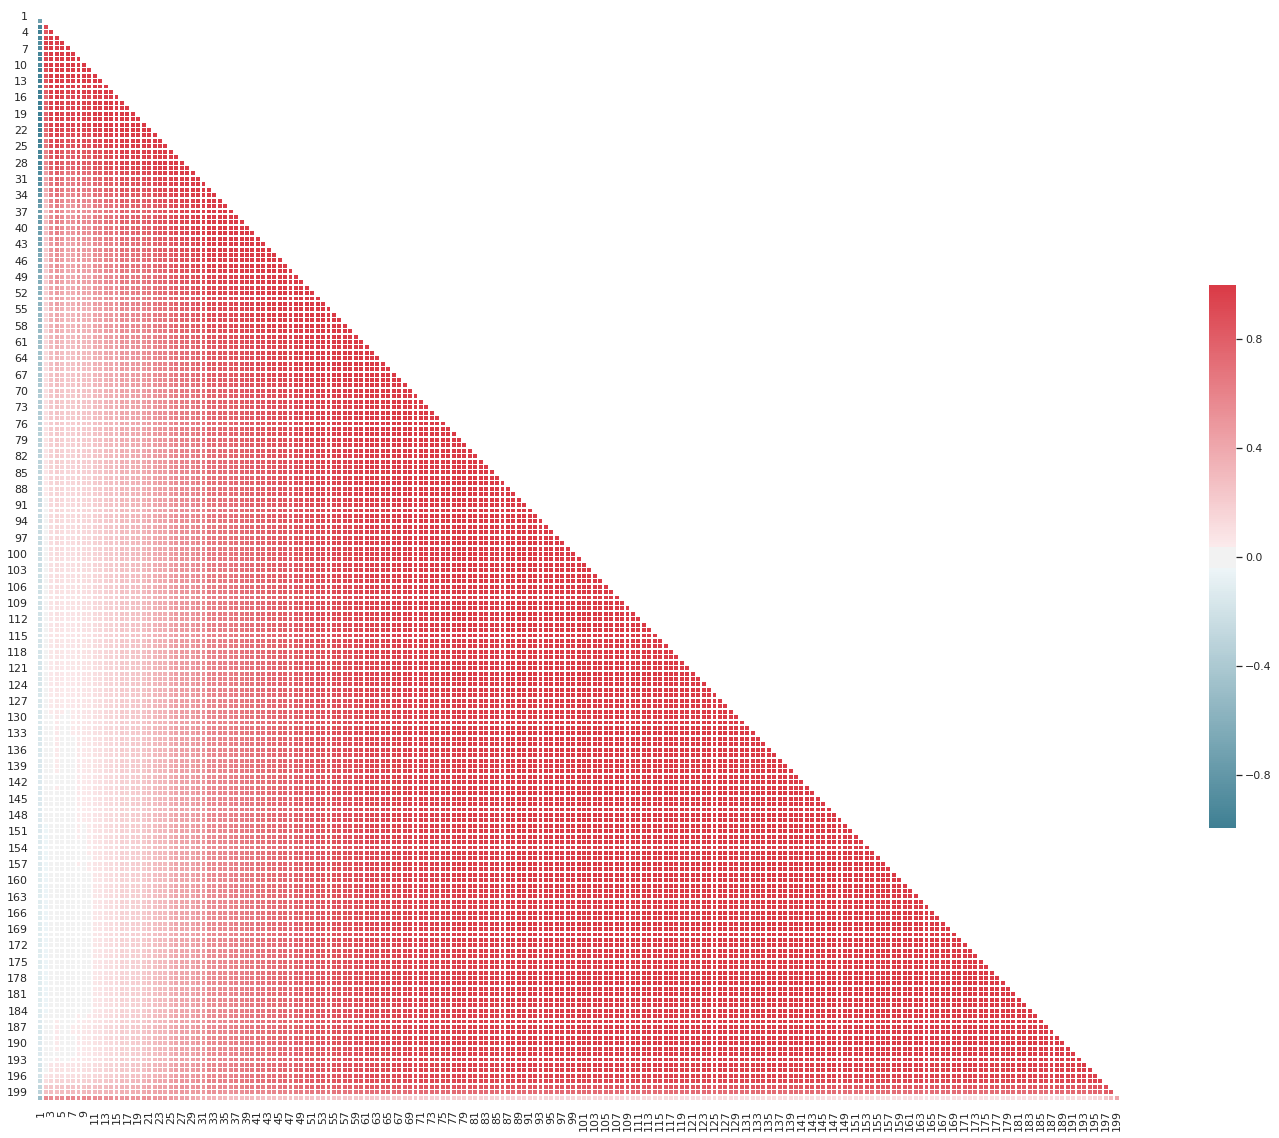

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
savefig('corr_no_label.png')

In [9]:
features_corr = []

for id_row, row in enumerate(corr):
    correlation_score = 0
    for id_col, val in enumerate(corr[row]):
        if id_col != id_row:
            correlation_score += abs(val)

    features_corr.append(correlation_score)

In [10]:
get_highest_values(features_corr, 20)

array([63, 64, 62, 65, 66, 61, 67, 68, 69, 60, 70, 59, 71, 58, 72, 57, 73,
       74, 75, 76])

In [11]:
get_lowest_values(features_corr, 20)

array([  0,   7,   3,   2,   1,   6,   4,   8,  10,   5,  11,   9,  12,
       199,  18,  14,  17,  13,  19,  16])

## Correlation analysis between SVD features and labels

In [8]:
df = pd.read_csv(data_file, sep=';', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0.747867,0.015906,0.013435,0.010133,0.009132,0.006958,0.006652,0.006193,0.005855,...,0.000031,0.000028,0.000023,0.000020,0.000014,0.000014,0.000010,0.000007,0.000003,2.854226e-16
1,1,0.742556,0.016040,0.013593,0.010234,0.009399,0.007116,0.006650,0.006278,0.006005,...,0.000057,0.000053,0.000043,0.000033,0.000029,0.000025,0.000022,0.000012,0.000006,3.012061e-16
2,1,0.741817,0.016078,0.013635,0.010261,0.009387,0.007099,0.006711,0.006291,0.006031,...,0.000067,0.000060,0.000060,0.000048,0.000036,0.000033,0.000017,0.000013,0.000006,1.667818e-16
3,1,0.728526,0.016202,0.014147,0.010591,0.009438,0.007605,0.006869,0.006649,0.006454,...,0.000118,0.000107,0.000101,0.000078,0.000072,0.000056,0.000033,0.000020,0.000006,3.226420e-16
4,0,0.747843,0.015910,0.013440,0.010138,0.009140,0.006962,0.006653,0.006193,0.005857,...,0.000032,0.000029,0.000023,0.000019,0.000015,0.000012,0.000010,0.000004,0.000002,3.281675e-16


In [9]:
# Compute the correlation matrix
corr = df.corr()

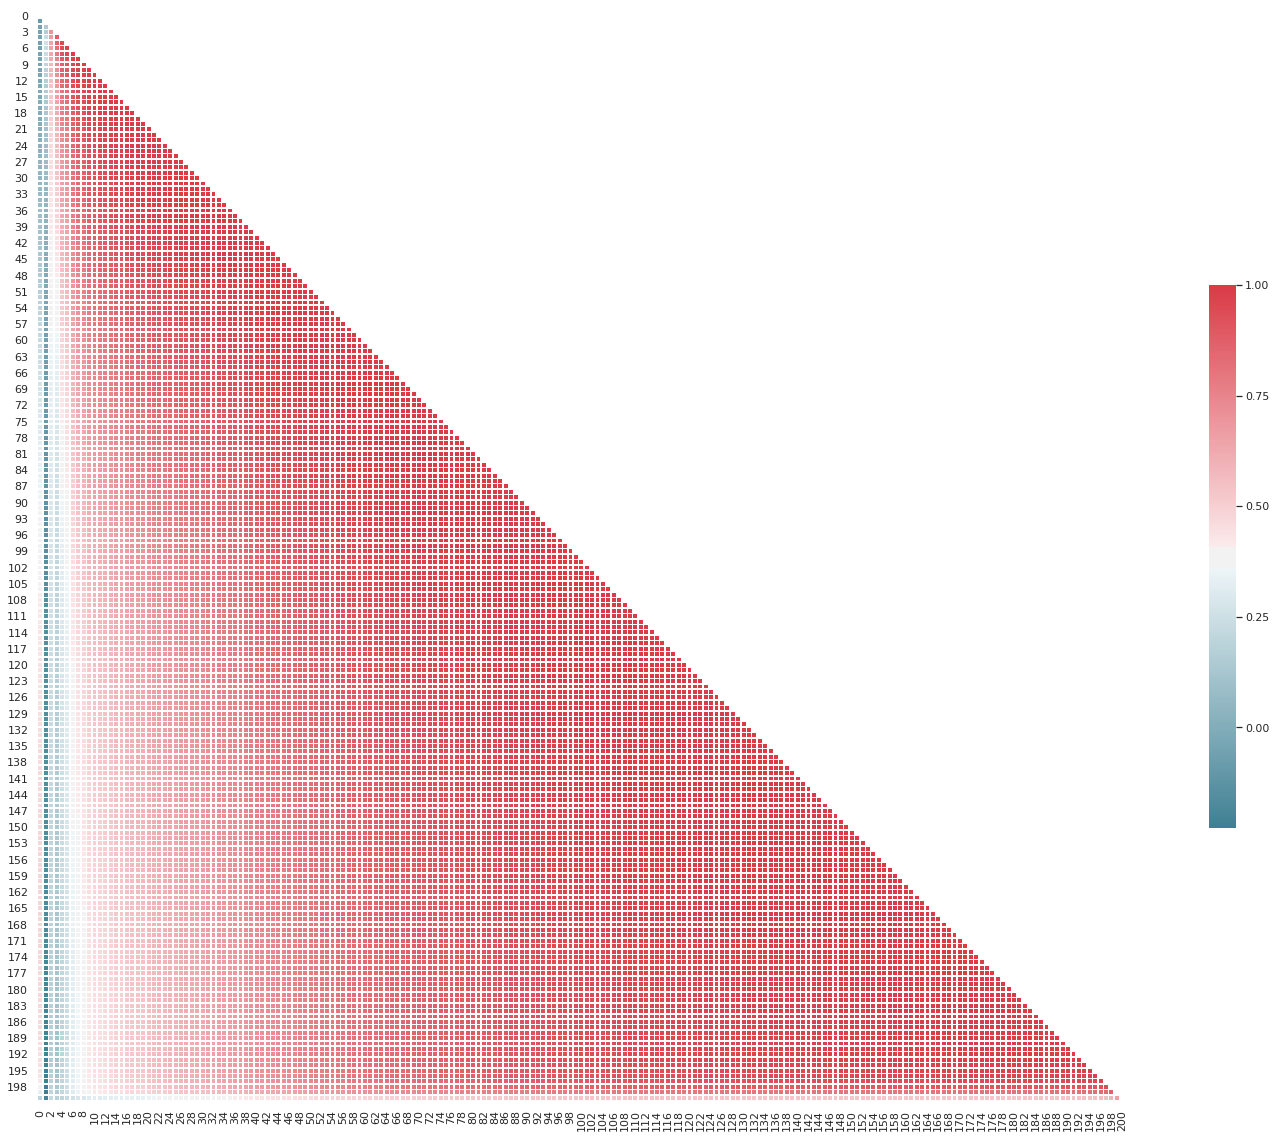

In [10]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
savefig('corr_with_label.png')

In [10]:
features_corr = []

for id_row, row in enumerate(corr):
    for id_col, val in enumerate(corr[row]):
        if id_col == 0 and id_row != 0:
            features_corr.append(abs(val))

In [12]:
get_highest_values(features_corr, 20)

array([ 0, 31, 33, 36, 40, 41, 37, 43, 39, 32, 42, 35, 45, 34, 44, 30, 38,
       50, 48, 49])

In [13]:
get_lowest_values(features_corr, 20)

array([123, 124, 125, 126, 122, 127, 128, 121, 129, 130, 120, 131, 119,
       118, 132, 133, 117, 134, 116, 135])